# Citrination demo on shape memory alloys

In this demo, we will look at how we can take data directly out of papers and use it to build predictive models

For any questions on this demo, feel free to get in touch with J. Ling at jling(at)citrine.io

### Step 1: Read interesting paper, get data

A recent paper by Xue et al. (2017) (http://dx.doi.org/10.1016/j.actamat.2016.12.009) presented results on how optimal experimental design can be used to discover new shape memory alloys.  Shape memory alloys present an attractive alternative to motorized actuators for many applications.  Xue et al. investigated the correlation between the alloy composition and the transition temperature.

In the paper by Xue et al., there is a data table in the supplementary files, which can be downloaded and saved as a csv.  (This csv is available in the ./SMA_demo/ folder as Xue_data.csv)


### Step 2: Pre-process data

In the data table, the formula of the different alloys is not one of the columns.  However, Citrination tends to give better predictions when the formula is available.  So, let's do some pre-processing in python to get the formula.  (The result of this pre-processing step is available as ./SMA_demo/Xue_data_with_formula.csv)

In [1]:
import pandas as pd

#  Read in csv to pandas dataframe
data = pd.read_csv("./SMA_demo/Xue_data.csv", delimiter=',')
num_points = data.shape[0]

#  Create a pandas series to hold the formula
formula = pd.Series(num_points, index=data.index)
for i in xrange(num_points):
    string = "Ti0.5" # All alloys in the data set are 50% Titanium
    elements = ["Ni", "Cu", "Fe", "Pd"]
    for el in elements:
        if data[el][i] > 0:
            string += el + str(data[el][i]/100.) 
    formula[i] = string
data["formula"] = formula   

#  Write output to new csv
data.to_csv("./SMA_demo/Xue_data_with_formula.csv", index=False)


### Step 3: Upload the data to Citrination

Once I have the csv of the data from the table, I upload it at https://citrination.com/add_data.

You'll need to choose a name and description for your dataset. Make sure to select the **Citrine: Template CSV** from the drop down menu.

Then click Submit Files.

I list all the columns as being "properties," except for the formula column, which is type "chemical formula."

I name my data set, then click "Save" in the top right.

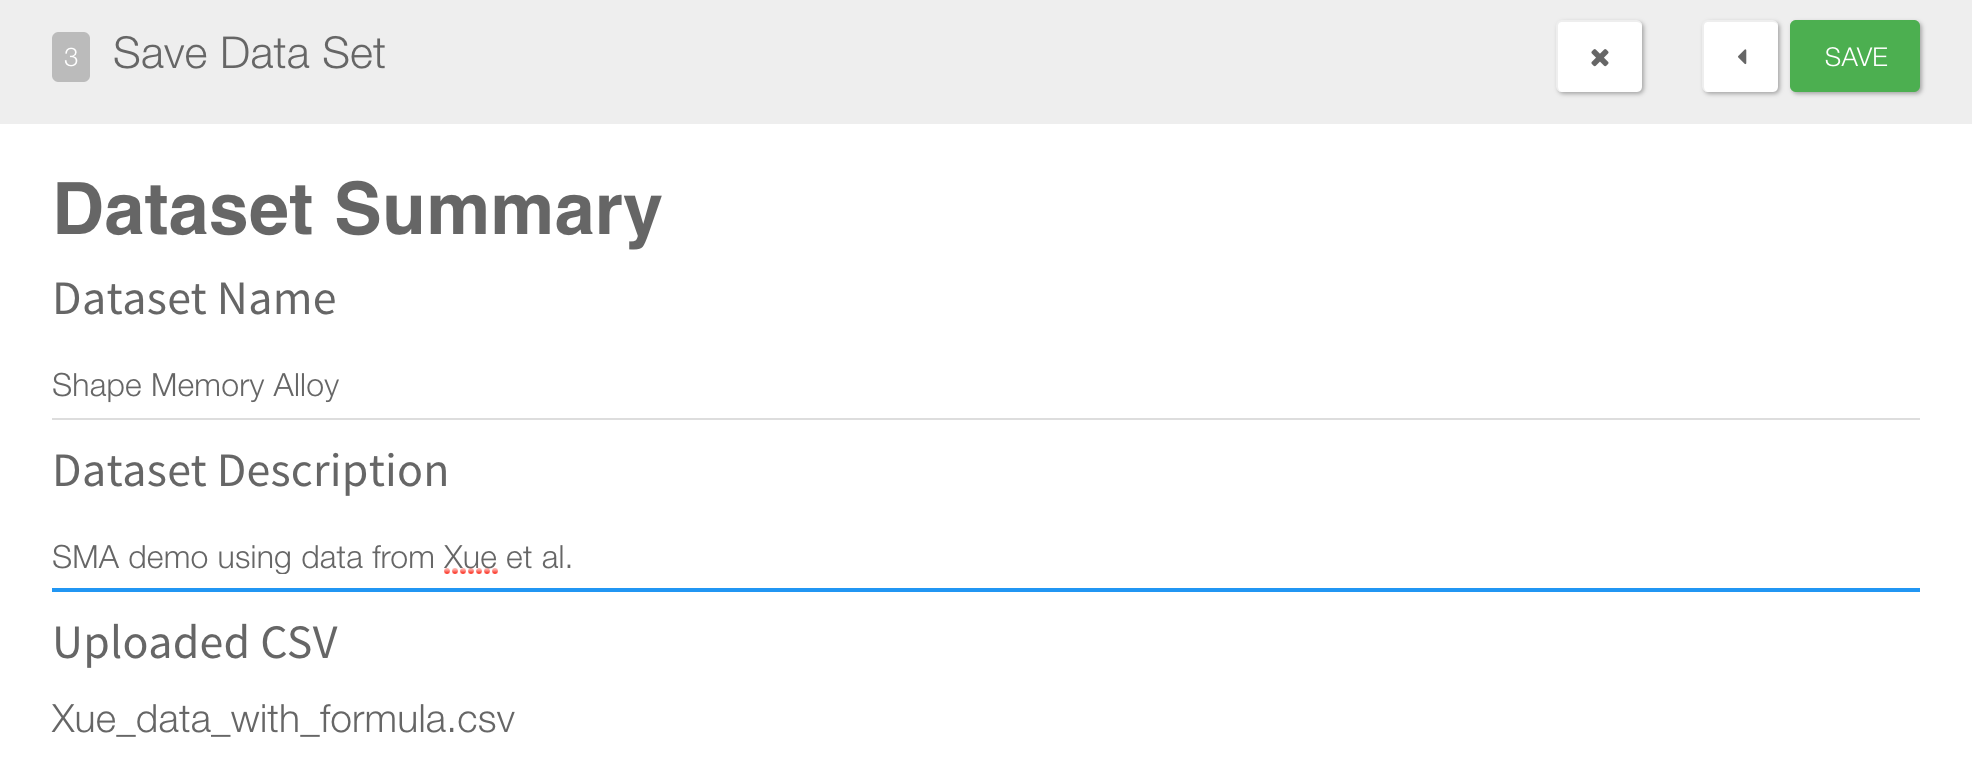

In [3]:
from IPython.display import Image
Image(filename='./SMA_demo/create_dataset.png', width=700)

I now have a searchable data set that I can filter by property.

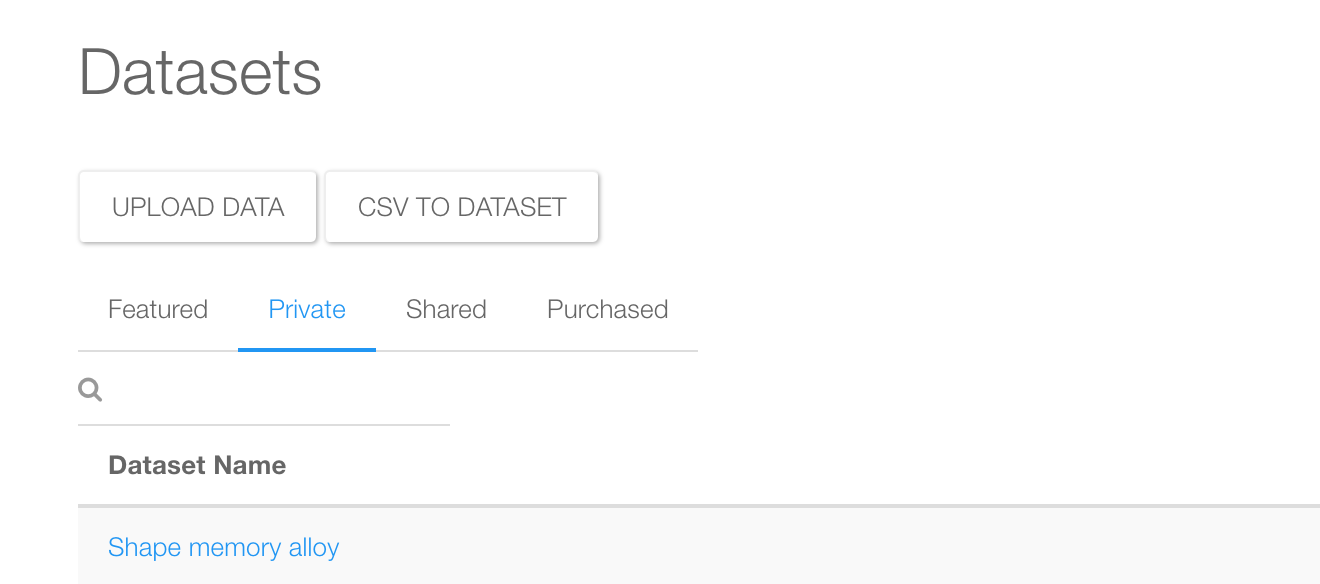

In [4]:
from IPython.display import Image
Image(filename='./SMA_demo/dataset.png', width=500)

### Step 4: Create model

Now I create a DataView using my new data set:   https://citrination.com/data_views

I find my newly created data set under the tab "My Datasets", select it, and click the "Next" button.

(You can find my completed data view at https://citrination.com/data_views/2838/ if you'd like to skip creating your own view.)


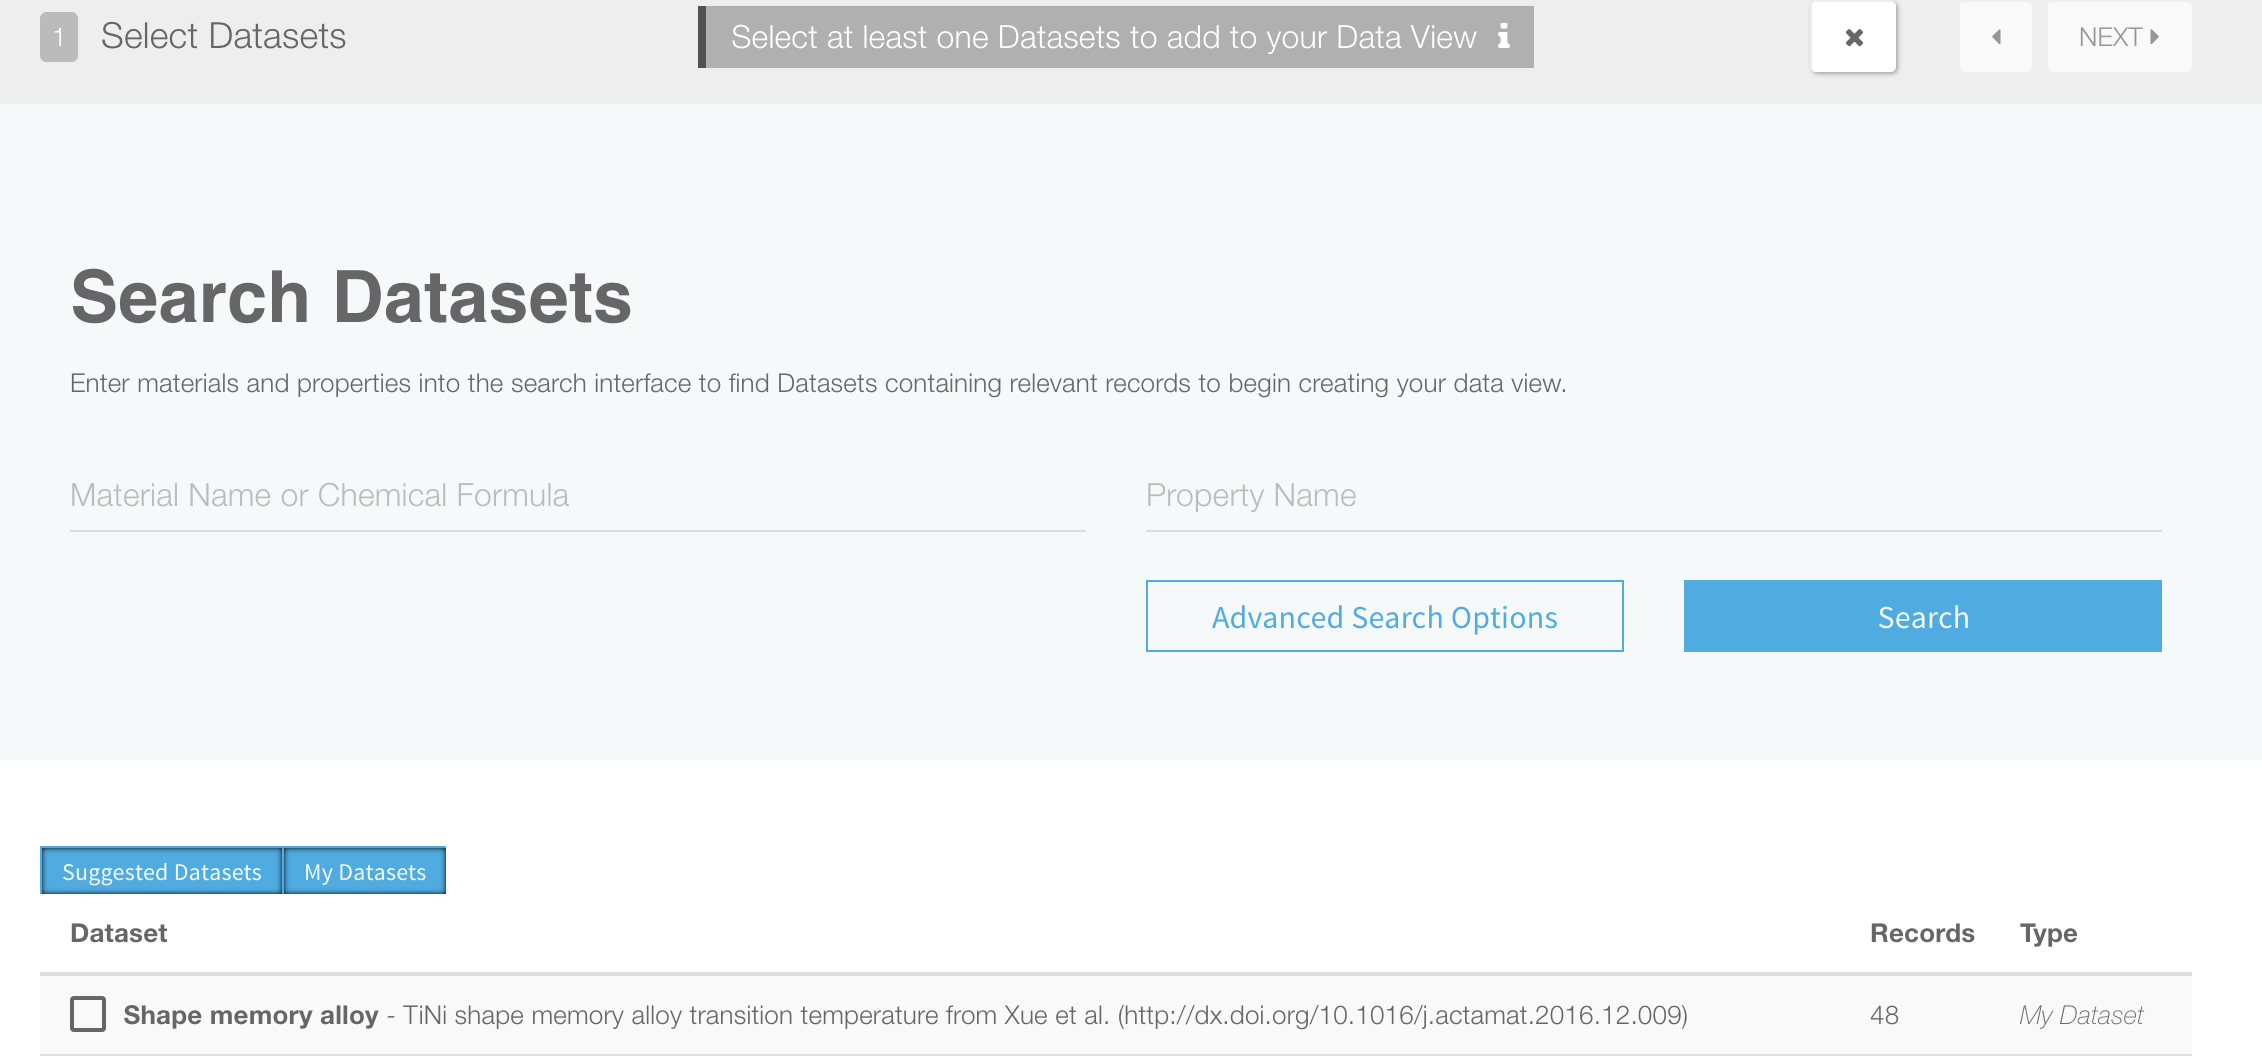

In [5]:
from IPython.display import Image
Image(filename='./SMA_demo/dataview_1.png', width=700)

- I include all the properties as column headers, then click "Next" again.
- I specify that Tp, the transition temperature, is the output.  For all other columns, I specify that they're inputs.
- Then I click "Next" again.
- Finally, I name and save my Data View:

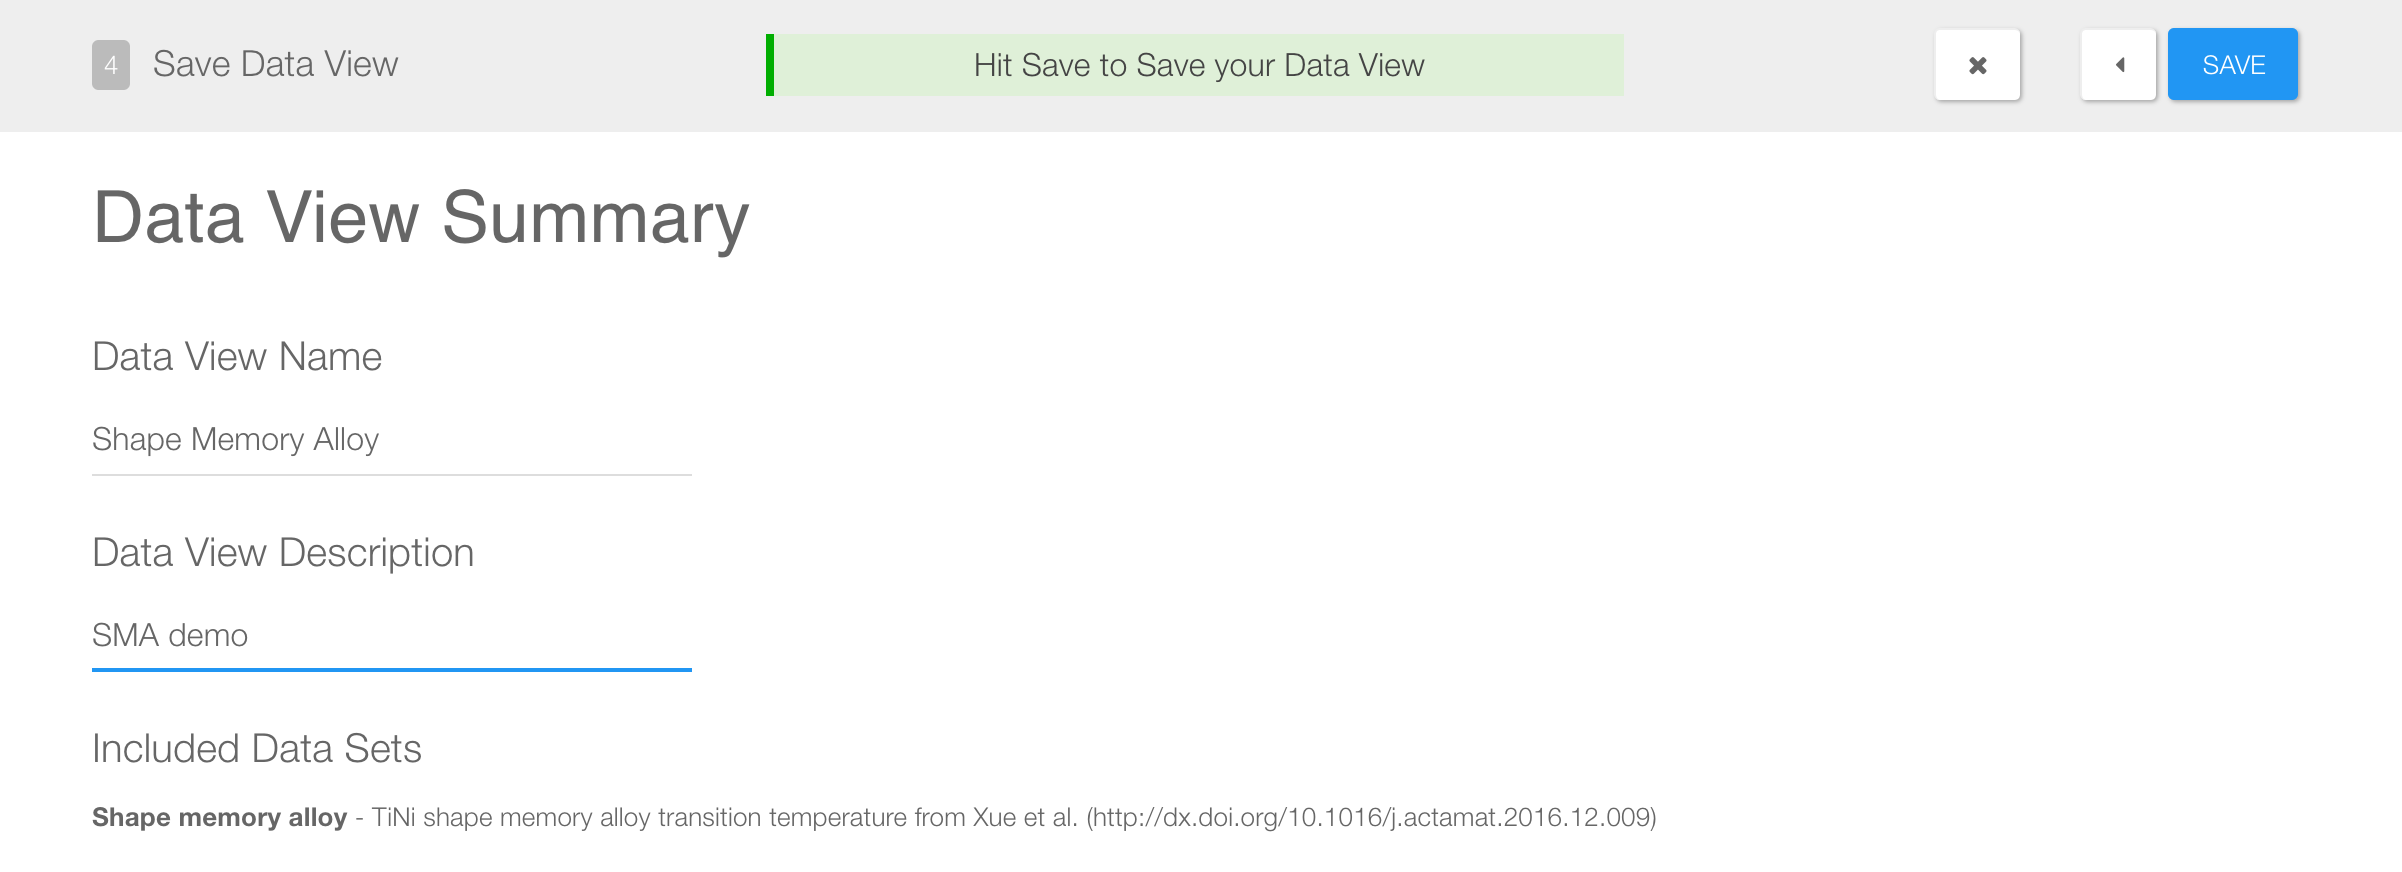

In [9]:
from IPython.display import Image
Image(filename='./SMA_demo/dataview_2.png', width=700)

A data view is now created, and machine learning models start to train.  After waiting about thirty seconds, the training is complete and I can see my new machine learning model!

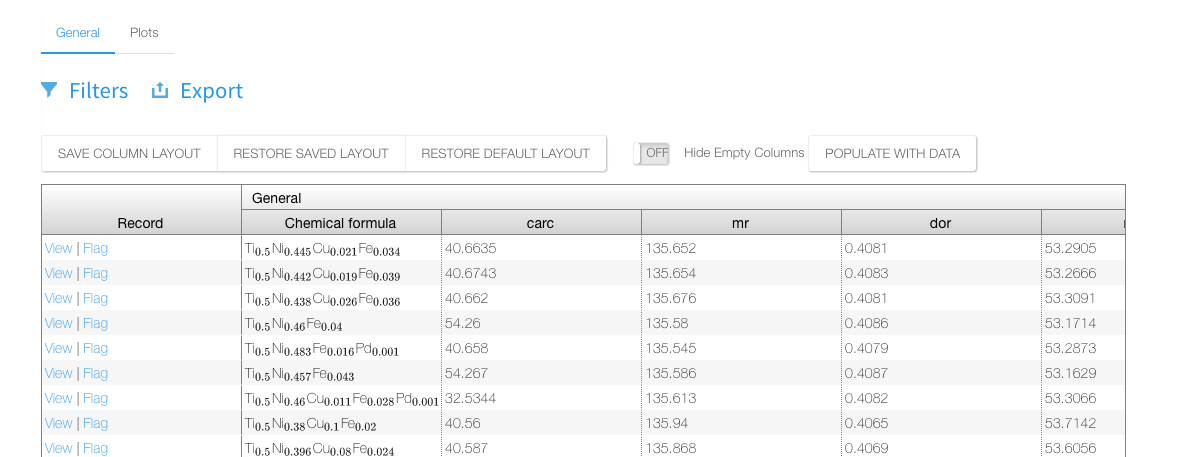

In [6]:
from IPython.display import Image
Image(filename='./SMA_demo/dataview_3.png', width=700)

I can now do things like look at model predictions at new test points (using the Predict tab), visualize my data set using t-SNE (using the Data Summary --> General tabs), or examine my model quality (using the Data Summary --> Estimator tabs).

For example, using the Data Summary --> Estimator tab, I can see that the most important features in creating the machine learning model are the Elemental crystal structure and the Iron content.

I can also look at the cross-validation predictions of our machine learning model, along with the associated error bars.

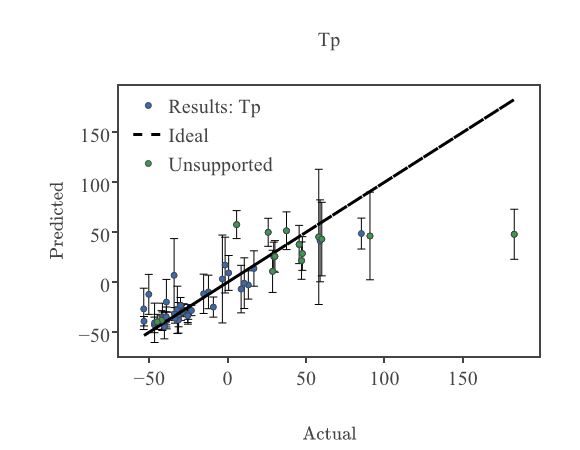

In [7]:
from IPython.display import Image
Image(filename='./SMA_demo/ml_predictions.png', width=700)

As this plot shows, our machine learning model for the transition temperature is pretty good!  

Now we can use this model for experimental design and making predictions for new alloy compositions.

### Congratulations--you now know how to go from reading an interesting journal article to creating a new machine learning model!